In [132]:
import matplotlib.pyplot as plt
import math

In [133]:
TIME = 0
DURATION = 30 #sec
DRONE_MASS = 0.175 #kg
DELTA_T = 0.1 #s
FUEL_CONSUMPTION = 0.6831 #liters
DIAMETER = 0.2 #m
AREA = 0.02 #m2 #change to 1
TOP_AREA = 0.3 #m2
ANGLE_OF_ATTACK = 15 #degrees

THRUST_DURATION = 0.1 #s

In [134]:
class Drone():

    def __init__(self, drone_mass, delta_t, diameter, area, thrust_duration, attack_angle, top_area):
        self.top_area = top_area
        self.attack_angle = attack_angle
        self.thrust_duration = thrust_duration
        self.area =area
        self.diameter = diameter
        self.drone_mass = drone_mass
        self.delta_t = delta_t
        self.x_vel = 0
        self.y_vel = 0
        self.delta_x_vel = 0
        self.delta_y_vel = 0
        self.x_pos = 0
        self.y_pos = 500
        self.delta_x_pos = 0
        self.delta_y_pos = 0
        self.a = 0
        

    def thrust(self):
        thrust = 10 #N
                
        acceleration = thrust / self.drone_mass

        self.delta_x_vel += acceleration * self.delta_t

    def angle_of_attack(self):
        if self.x_vel != 0:
            self.a = abs(math.tan(self.y_vel/self.x_vel) - self.attack_angle)

    def drag(self):
        density_of_air = 1.293 #kg m−3
        viscosity_of_air = 1.48*10**(-5) #m2/s
        # self.angle_of_attack()
        # cd0 = 0.08
        # cda = 2.27

        # drag_cooficient = cd0 + cda*((self.a-self.attack_angle)**2)
        drag_cooficient = 0.08

        #Reynolds number
        #r_numebr = (density_of_air * self.x_vel * self.diameter)/viscosity_of_air

        #laminal:
        # if(r_numebr < 3750):
        #     pass

        # #turbulent:
        # else:
        #     pass

        drag = -0.5*density_of_air*(self.x_vel**2)*self.area*drag_cooficient

        acceleration = drag / self.drone_mass

        self.delta_x_vel += acceleration * self.delta_t


    def start_x(self):
        self.delta_x_vel = 0
        
        if self.thrust_duration > 0:
            self.thrust()
            self.thrust_duration -= self.delta_t
        else:
            print('DONE')

        self.drag()
        self.x_vel += self.delta_x_vel
        self.delta_x_pos = self.x_vel * self.delta_t
        self.x_pos += self.delta_x_pos

    def gravity(self):
        g = 9.81 #m/s2

        self.delta_y_vel += -g*self.delta_t

    def lift(self):
        density_of_air = 1.293 #kg m−3
        viscosity_of_air = 1.48*10**(-5) #m2/s

        # cl0 = 0.15
        # cla = 1.4

        # lift_cooficient = cl0 + cla*self.attack_angle
        lift_cooficient = 0.15

        lift = 0.5*density_of_air*(self.x_vel**2)*self.top_area*lift_cooficient

        acceleration = lift / self.drone_mass

        self.delta_y_vel += acceleration * self.delta_t

    def start_y(self):
        if self.y_pos <= 0:
            self.y_vel = 0
            self.x_vel = 0

        self.delta_y_vel = 0
        self.lift()
        self.gravity()
        self.y_vel += self.delta_y_vel
        self.delta_y_pos = self.y_vel * self.delta_t
        self.y_pos += self.delta_y_pos



In [135]:
TIME = 0
y_velocities = []
x_velocities = []
times = []
x_positions = []
y_positions = []

drone = Drone(DRONE_MASS, DELTA_T, DIAMETER, AREA, THRUST_DURATION, ANGLE_OF_ATTACK, TOP_AREA)

for t in range(0, int(DURATION/DELTA_T)):
    drone.start_x()
    drone.start_y()
    x_velocities.append(drone.x_vel)
    y_velocities.append(drone.y_vel)
    x_positions.append(drone.x_pos)
    y_positions.append(drone.y_pos)
    TIME += DELTA_T
    times.append(TIME)
    print(drone.x_vel)






5.714285714285715
DONE
5.694984956268223
DONE
5.675814359800935
DONE
5.656772611156148
DONE
5.637858414240946
DONE
5.619070490302092
DONE
5.600407577636833
DONE
5.581868431309474
DONE
5.563451822873592
DONE
5.545156540099756
DONE
5.526981386708626
DONE
5.5089251821093175
DONE
5.490986761142887
DONE
5.4731649738308485
DONE
5.455458685128593
DONE
5.437866774683595
DONE
5.420388136598312
DONE
5.403021679197659
DONE
5.385766324800958
DONE
5.36862100949827
DONE
5.351584682930997
DONE
5.334656308076677
DONE
5.317834861037858
DONE
5.301119330834985
DONE
5.2845087192031865
DONE
5.268002040392895
DONE
5.251598320974209
DONE
5.23529659964491
DONE
5.219095927042064
DONE
5.202995365557128
DONE
5.186993989154479
DONE
5.171090883193301
DONE
5.155285144252747
DONE
5.139575879960318
DONE
5.1239622088233805
DONE
5.108443260063763
DONE
5.093018173455357
DONE
5.077686099164667
DONE
5.062446197594246
DONE
5.047297639228956
DONE
5.032239604484983
DONE
5.017271283561566
DONE
5.002391876295382
DONE
4.9876005

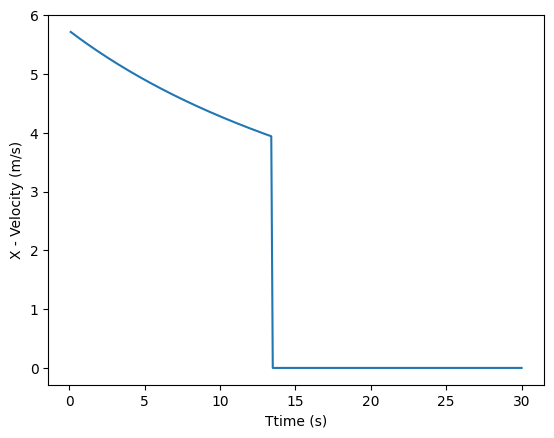

In [136]:
plt.plot(times, x_velocities)
plt.xlabel('Ttime (s)')
plt.ylabel('X - Velocity (m/s)')
plt.show()

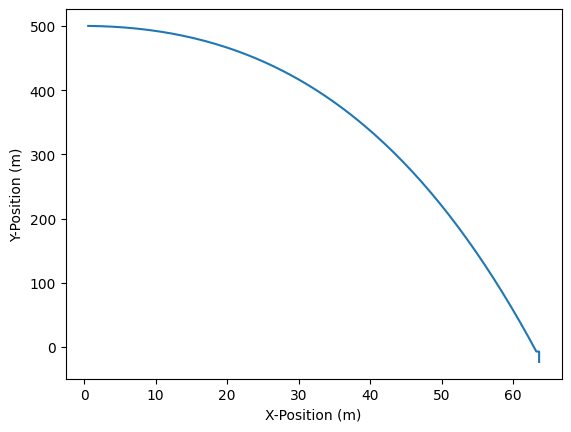

In [137]:
plt.plot(x_positions, y_positions)
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.show()

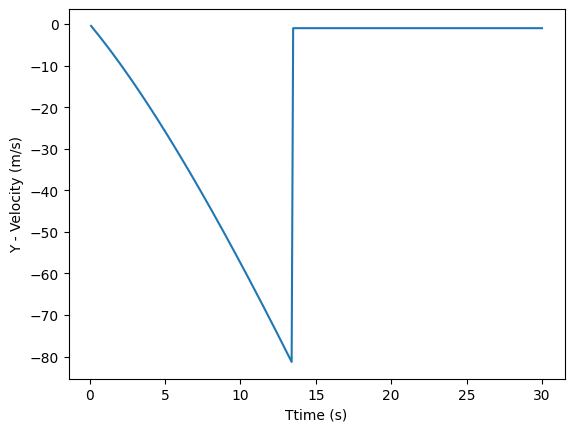

In [138]:
plt.plot(times, y_velocities)
plt.xlabel('Ttime (s)')
plt.ylabel('Y - Velocity (m/s)')
plt.show()